## Content

1. [Introduction to Matrix Algebra](#matrix_algebra)
2. [The Least Squares Method for Data Science](#the_least_squares_for_data_science)





### The least squares model






<a name="matrix_algebra">
</a>

<center> <h1>Introduction to Matrix Algebra</h1> </center>

 To be able to understand the least squares method with matrix algebra jargon then we should recall some of the notions first. 
 
### The dot product of two vectors in $\mathbb{R}^n$
 
 Let us consider two vectors $\vec{u}$ and $\vec{v}$ in $\mathbb{R}^n$. In coordinates we could write write these vectors as  $\vec{u} = (u_1, \cdots u_{n})$ and $ \vec{v} = (v_1 \cdots v_{n})$ . Recall that the dot product of $\vec{u}$ and $\vec{v}$ is given in two different but equal ways mathematically. 
 
 $$ \vec{u} \cdot \vec{v} = \sum\limits_{i=1}^{n} u_i   v_i = u_1 v_1 + u_2 v_2 + \cdots u_n v_n$$
 
 
 One can show using some linear algebra that in $\mathbb{R}^{n}$ this formula is equaivalent to the:
 
 $$ \vec{u} \cdot \vec{v} = |u||v|\cos(\theta)$$ 
 
 where $|u|$ represents the length of the vector $\vec{u} \in \mathbb{R}^{n}$. Note that two different but equal versions of the dot product allow us to measure angles between vectors. For example if $\vec{u}$ is perpendicular to $\vec{v}$ then $\cos(\theta) = 0$ so $ \vec{u}\cdot \vec{v} = 0$. Also very clearly, we can see that if the dot product of two non-zero vectors is zero then the angle between them should be $\frac{\pi}{2}$. Finally note that $\vec{u}\cdot \vec{u} = |u|^2$
 
 
 For more on the inner products:
 
 [Andrew Ng - Machine Learning](https://www.youtube.com/watch?v=QKc3Tr7U4Xc&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=72)
 
 [Khan Academy](https://www.youtube.com/watch?v=WNuIhXo39_k)
 ### Left Multiplication of a Matrix with a column vector. 
 
 let us consider a matrix $A = \big[A_{ij}\big]_{n\times n}$ and a vector $\vec{u} = (u_1 \cdots u_n)$. Then the multiplication $A \vec{u} = b $ can be written as $b_i  = \sum \limits_{j =1}^{n} A_{ij}u_j $. Let's make it more concrete. Suppose we are working with $3\times 3 $ matrix $A$. Then 
 
 $$\vec{b} =\begin{bmatrix}
    A_{11} & A_{12} & A_{13} \\
    A_{12} & A_{22} & A_{23} \\
    A_{13} & A_{23} & A_{33}\\
\end{bmatrix}   \begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3
\end{bmatrix} =  \begin{bmatrix}
    \vec{r_1} \cdot \vec{u} \\
    \vec{r_2} \cdot \vec{u} \\
    \vec{r_3} \cdot \vec{u}
\end{bmatrix} = \begin{bmatrix}
    A_{11}x_1 + A_{12}x_2 + A_{13}x_3 \\
    A_{21}x_1 + A_{22}x_2 + A_{23}x_3 \\
    A_{31}x_1 + A_{32}x_2 + A_{33}x_3 \\
\end{bmatrix} = \begin{bmatrix}
    b_1 \\
    b_2 \\
    b_3
\end{bmatrix}$$ 


where $\vec{r_i}$ repsents $i^{th}$-row of the matrix $A$. We will refer this interpretation of matrix multiplication as *'dot_product-version'*. Now the same equation can be seen as the linear combination of the columns of the matrix $A$:


$$\begin{bmatrix}
    A_{11} \\
    A_{21} \\
    A_{31} 
\end{bmatrix} x_1 + \begin{bmatrix}
    A_{12} \\
    A_{22} \\
    A_{32} 
\end{bmatrix} x_2 +  \begin{bmatrix}
    A_{13} \\
    A_{23} \\
    A_{33} 
\end{bmatrix} x_3  =\begin{bmatrix}
    A_{11}x_1 + A_{12}x_2 + A_{13}x_3 \\
    A_{21}x_1 + A_{22}x_2 + A_{23}x_3 \\
    A_{31}x_1 + A_{32}x_2 + A_{33}x_3 \\
\end{bmatrix} = \begin{bmatrix}
    b_1 \\
    b_2 \\
    b_3
\end{bmatrix}$$ 

Due to the second interpretation we can say if $$A \vec{x} = \vec{b}$$ then $\vec{b}$ lies on the column space of A as it can be expressed as a linear combination of the column vectors of A. We will refer this interpretation of the matrix multiplication as *'linear combinations of columns'*.

[Dot product interpretation of matrix multiplication](https://www.youtube.com/watch?v=Awcj447pYuk)

[Matrix multiplication - both interpretation](https://www.youtube.com/watch?v=7Mo4S2wyMg4)


<a name="the_least_squares_for_data_science">
</a>

<center> <h1>The Least Square Method for Data Science</h1> </center>


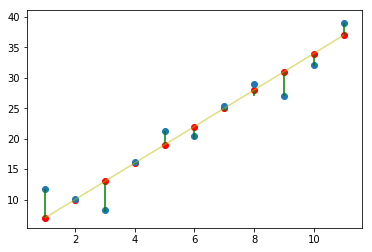

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

noise = np.random.normal(0, 3, 11)
x_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
x = pd.DataFrame([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
line = [3*i +4 for i in x_list ]
y_list = [int(i+j) for (i,j) in zip(line, noise)]
y = pd.DataFrame([i+j for (i,j) in zip(line, noise)])
fig, ax = plt.subplots()

ax.scatter(x, line, c = 'r')
ax.plot(x,line, c = 'y', alpha = 0.5)
# Sample data to play with.
ax.scatter(x, y)

for i in range(len(noise)):
    if y_list[i] <= line[i]:
        ax.vlines(x = x_list[i], ymin = y_list[i], ymax = y_list[i] - noise[i], colors= 'g')
    else:
        ax.vlines(x = x_list[i], ymin = line[i], ymax = line[i] + noise[i], colors = 'g')

        
plt.savefig('leastsquare.png')






Recall that our goal is to fit 'the best line'. For the least square method we say 'the best line' should make the errors (green line segments) as small as possible. Let's see what this corresponds mathematically. If we label each data as its coordinates $(x_i, y_i)$ then if we think an arbitrary line in the form $\hat{y} = ax + b$ the errors can be written as $e_i  =\hat{y}_i - y_i = (a x_{i} +b) - y_i$. Note that for each data (for each i) we will get a different equation and therefore we got a system of equations. This system can be written as $$\vec{e} = [a]_{1x1}\vec{x} -\vec{y} + \vec{b}$$


Suppose we are given n-sample in the form $$\{(x_1, y_1), (x_2, y_2), \cdots (x_3, y_3), (x_n, y_n)\}$$ 

Recall that in basic linear regression we are trying to find a line so that line passes from  each of the points $(x_i, y_i)$. Mathematically, this is equivalent to find $C, D$ so that $$ C +  D x_i = y_i $$ for all $i \in \{1, \cdots n\}$. In fact, if we write this more explicitly we would see something like this:

$$ \begin{eqnarray}C + D x_1 &=& y_1 \\
C + D x_2 &=& y_2 \\
C + D x_3 & =& y_3 \\
C+ D x_4 & = & y_4 \\
\vdots \\
C + D x_n &= & y_n
\end{eqnarray}$$



Note that matrix algebra is perfect to write this kind of system of equations in a compact way. So  in linear algebra language the system of equations can be written as simple as: line as $A \vec{u} = \vec{y} $. More explicitly:

$$ \underbrace{\begin{bmatrix}
    1 & x_{1} \\
    1 & x_{2}  \\
    1 & x_{3} \\
\vdots & \vdots \\
    1 & x_{n}
\end{bmatrix}}_A  \underbrace{\begin{bmatrix}
    C \\
    D  
\end{bmatrix}}_{\vec{u}} = \underbrace{\begin{bmatrix}
    y_1 \\
    y_2 \\
    y_3 \\
    \vdots\\
    y_n
\end{bmatrix}}_{\vec{y}}$$ 

First we should ask ourselves whether such $C, D$ exists. This means can we write $\vec{y}$ as a linear combination of columns vectors of $A$. Notice that this problem is equivalent to ask whether or not $\vec{y}$ in the column space of A. Also solving this problem is relatively straight forward. 

[Solving system of linear equations](https://www.youtube.com/watch?v=CsTOUbeMPUo)

[Inconsistent system of linear equations](https://www.youtube.com/watch?v=oGwNLitgbqY)

We know that in real life because of the noise it is almost impossible to get a sample that perfectly lies on a line. Therefore most of the time we know that there is no solution for the equation above. This means for any $C, D$ we will get $A\vec{u} \neq \vec{y}$ and obviously for different values of $C, D$ we will get different errors.  Therefore for a particular value of $C, D$ we can find the error vector by $ \vec{e} = A\vec{u}  - \vec{y}$. Note that $\vec{e} = \{e_1 \cdots e_n \}$ and basically the absolute value of $e_i$ correspons to the lenght of the $i^{th}$ green line segment below.

![Leastsquare](leastsquare.png)



Then we enter to the next phase. The least squares method basically try to find a solution $(C,D)$ so that the length of the error vector is the minimum. Most of the time we see this problem from calculus perspective as finding the derivatives and set them equal to zero. However linear algebra offers a more geometric picture. 

Note that we already assume that the vector $\vec{y}$ is not in the column space of A. Let's try to visualize this column space as a plane (containing zero as it is a subspace) in the space. Since $\vec{y}$ is not in it we will show $\vec{y}$ as another vector on the space.

![projection](projection.png)


Note that the error vector is denoted by $\vec{z}$ on the above figure. But more importantly it is clear that the error vector would be minumum when it is perpendicular to the plane. This means the error vector should be perpendicular to every vector in the column space of A. We can write this condition as:

$$ \vec{C_i} \cdot \vec{e} = 0 $$


Where $\vec{C_i}$ is $i^{th}$ column vector of $A$:



$$A =\begin{bmatrix}
    |   & \dots & |   &  \dots & |    \\
    |   & \dots & |   &  \dots & |     \\
    C_1 & \dots & C_i &  \dots & C_{n}  \\
    |   & \dots & |   &  \dots & |       \\
    |   & \dots & |   &  \dots & |   
\end{bmatrix}$$

This condition can be easily written as $A^{T} \vec{e} = 0$: The reason for this is the following. Recall that $A$-transpose is the matrix created by making columns rows and rows to column:

$$\underbrace{\begin{bmatrix}
    ----    &  C_{1}^{T} &  ----   \\
    \vdots    &  \vdots    &  \vdots    \\
    ----    &  C_{i}^{T} &  ----      \\
     \vdots    &  \vdots    &  \vdots     \\
     ----    &  C_{n}^{T} &  ----  
\end{bmatrix}}_{A^{T}} \cdot \underbrace{\begin{bmatrix}
    e_1 \\
    \vdots \\
    e_i \\
    \vdots\\
    e_n
\end{bmatrix}}_{\vec{e}} = \begin{bmatrix}
    C_{1} \cdot e_1  \\
    \vdots \\
    C_{i} \cdot e_i\\
    \vdots\\
   C_{n} \cdot e_n
\end{bmatrix} = 0$$


We can finish this part by recalling $\vec{e} = A\vec{u} - \vec{y}$. So the equation above become: 



$$ \begin{eqnarray}
A^{T}(A\vec{u} - \vec{y}) &=& 0 \\
A^{T}A \vec{u} - A^{T}\vec{y} &=& 0 \\
A^{T}A \vec{u} & = & A^{T}\vec{y} \\
(A^{T}A)^{-1}A^{T}\vec{y} &=& \vec{u}
\end{eqnarray}$$

Note that we are given $A$ and $\vec{y}$ so by applying above formula we get 'the best' solution $\vec{u}$. However note that the projection of $\vec{y}$ onto column space is given by $A\vec{u} = A(A^{T}A)^{-1}A^{T}\vec{y}$. This is why the matric on the left hand side $P = A(A^{T}A)^{-1}A^{T} $ is called the projection matrix of A.
